In [2]:
import pandas as pd 
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials 
from collections import Counter

In [3]:
sp = spotipy.Spotify() 

cid ="d062190fd93b4e4488e75ae2d9256814" 

secret = "5afbd4a19ee54607be0db6036fb417c2"

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 

sp.trace=False 

In [4]:
playlist_l = sp.user_playlist("Liked", "3cYqEaPBFyxqlXbViPtzDv?si=3553c6c98f714847") 
playlist_d = sp.user_playlist("Disliked", "4HC1kIY2bof1CHfZqmo8u1?si=080494e8e1bf4f75") 

In [5]:
liked_songs = playlist_l["tracks"]["items"] 

In [6]:
liked_ids = [] 
for i in range(len(liked_songs)): 
    liked_ids.append(liked_songs[i]["track"]["id"])

In [7]:
liked_features = sp.audio_features(liked_ids) 

In [8]:
liked_df = pd.DataFrame(liked_features)
liked_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.271,0.165,5,-20.652,1,0.0351,0.7290,0.000002,0.1180,0.2030,77.082,audio_features,29U7stRjqHU6rMiS8BfaI9,spotify:track:29U7stRjqHU6rMiS8BfaI9,https://api.spotify.com/v1/tracks/29U7stRjqHU6...,https://api.spotify.com/v1/audio-analysis/29U7...,139227,4
1,0.177,0.215,3,-9.886,1,0.0335,0.8070,0.000125,0.0921,0.0415,75.862,audio_features,2MfwT3SKUyF0na2LCa2fCp,spotify:track:2MfwT3SKUyF0na2LCa2fCp,https://api.spotify.com/v1/tracks/2MfwT3SKUyF0...,https://api.spotify.com/v1/audio-analysis/2Mfw...,188864,3
2,0.530,0.497,0,-11.348,1,0.0322,0.4980,0.000384,0.0665,0.1000,141.977,audio_features,5b7wNSn8yuj5ZZ3JAlzoBt,spotify:track:5b7wNSn8yuj5ZZ3JAlzoBt,https://api.spotify.com/v1/tracks/5b7wNSn8yuj5...,https://api.spotify.com/v1/audio-analysis/5b7w...,345933,4
3,0.617,0.567,0,-4.188,1,0.0828,0.0584,0.000000,0.0933,0.5050,90.246,audio_features,1CnPYaKxTVb4LWOtiGOm0m,spotify:track:1CnPYaKxTVb4LWOtiGOm0m,https://api.spotify.com/v1/tracks/1CnPYaKxTVb4...,https://api.spotify.com/v1/audio-analysis/1CnP...,217603,4
4,0.214,0.367,6,-10.858,0,0.0321,0.8440,0.018100,0.1880,0.1750,79.854,audio_features,1M8OAc4NnD5GFMUiqjebaS,spotify:track:1M8OAc4NnD5GFMUiqjebaS,https://api.spotify.com/v1/tracks/1M8OAc4NnD5G...,https://api.spotify.com/v1/audio-analysis/1M8O...,281844,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.374,0.249,1,-10.985,1,0.0395,0.9360,0.008760,0.1140,0.0633,128.018,audio_features,4eCXQY1vh9XMW66LmS5alP,spotify:track:4eCXQY1vh9XMW66LmS5alP,https://api.spotify.com/v1/tracks/4eCXQY1vh9XM...,https://api.spotify.com/v1/audio-analysis/4eCX...,200093,4
96,0.588,0.362,8,-13.062,1,0.0295,0.4330,0.004680,0.0904,0.0995,132.472,audio_features,6UzdCUyZa27ez12pK56uSo,spotify:track:6UzdCUyZa27ez12pK56uSo,https://api.spotify.com/v1/tracks/6UzdCUyZa27e...,https://api.spotify.com/v1/audio-analysis/6Uzd...,379653,4
97,0.401,0.567,10,-9.131,1,0.0355,0.1710,0.008590,0.1030,0.3620,171.059,audio_features,6FQcdl2PzmsoXRF3F1flZ5,spotify:track:6FQcdl2PzmsoXRF3F1flZ5,https://api.spotify.com/v1/tracks/6FQcdl2Pzmso...,https://api.spotify.com/v1/audio-analysis/6FQc...,217973,3
98,0.626,0.308,6,-17.163,0,0.0294,0.8300,0.057800,0.1080,0.3230,129.928,audio_features,5kkqN6Lx3ZioloqqxC7Kyj,spotify:track:5kkqN6Lx3ZioloqqxC7Kyj,https://api.spotify.com/v1/tracks/5kkqN6Lx3Zio...,https://api.spotify.com/v1/audio-analysis/5kkq...,226890,4


In [9]:
target = []

for i in range(liked_df.shape[0]):
    target.append(1)

In [10]:
liked_df['target'] = target
liked_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,target
0,0.271,0.165,5,-20.652,1,0.0351,0.7290,0.000002,0.1180,0.2030,77.082,audio_features,29U7stRjqHU6rMiS8BfaI9,spotify:track:29U7stRjqHU6rMiS8BfaI9,https://api.spotify.com/v1/tracks/29U7stRjqHU6...,https://api.spotify.com/v1/audio-analysis/29U7...,139227,4,1
1,0.177,0.215,3,-9.886,1,0.0335,0.8070,0.000125,0.0921,0.0415,75.862,audio_features,2MfwT3SKUyF0na2LCa2fCp,spotify:track:2MfwT3SKUyF0na2LCa2fCp,https://api.spotify.com/v1/tracks/2MfwT3SKUyF0...,https://api.spotify.com/v1/audio-analysis/2Mfw...,188864,3,1
2,0.530,0.497,0,-11.348,1,0.0322,0.4980,0.000384,0.0665,0.1000,141.977,audio_features,5b7wNSn8yuj5ZZ3JAlzoBt,spotify:track:5b7wNSn8yuj5ZZ3JAlzoBt,https://api.spotify.com/v1/tracks/5b7wNSn8yuj5...,https://api.spotify.com/v1/audio-analysis/5b7w...,345933,4,1
3,0.617,0.567,0,-4.188,1,0.0828,0.0584,0.000000,0.0933,0.5050,90.246,audio_features,1CnPYaKxTVb4LWOtiGOm0m,spotify:track:1CnPYaKxTVb4LWOtiGOm0m,https://api.spotify.com/v1/tracks/1CnPYaKxTVb4...,https://api.spotify.com/v1/audio-analysis/1CnP...,217603,4,1
4,0.214,0.367,6,-10.858,0,0.0321,0.8440,0.018100,0.1880,0.1750,79.854,audio_features,1M8OAc4NnD5GFMUiqjebaS,spotify:track:1M8OAc4NnD5GFMUiqjebaS,https://api.spotify.com/v1/tracks/1M8OAc4NnD5G...,https://api.spotify.com/v1/audio-analysis/1M8O...,281844,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.374,0.249,1,-10.985,1,0.0395,0.9360,0.008760,0.1140,0.0633,128.018,audio_features,4eCXQY1vh9XMW66LmS5alP,spotify:track:4eCXQY1vh9XMW66LmS5alP,https://api.spotify.com/v1/tracks/4eCXQY1vh9XM...,https://api.spotify.com/v1/audio-analysis/4eCX...,200093,4,1
96,0.588,0.362,8,-13.062,1,0.0295,0.4330,0.004680,0.0904,0.0995,132.472,audio_features,6UzdCUyZa27ez12pK56uSo,spotify:track:6UzdCUyZa27ez12pK56uSo,https://api.spotify.com/v1/tracks/6UzdCUyZa27e...,https://api.spotify.com/v1/audio-analysis/6Uzd...,379653,4,1
97,0.401,0.567,10,-9.131,1,0.0355,0.1710,0.008590,0.1030,0.3620,171.059,audio_features,6FQcdl2PzmsoXRF3F1flZ5,spotify:track:6FQcdl2PzmsoXRF3F1flZ5,https://api.spotify.com/v1/tracks/6FQcdl2Pzmso...,https://api.spotify.com/v1/audio-analysis/6FQc...,217973,3,1
98,0.626,0.308,6,-17.163,0,0.0294,0.8300,0.057800,0.1080,0.3230,129.928,audio_features,5kkqN6Lx3ZioloqqxC7Kyj,spotify:track:5kkqN6Lx3ZioloqqxC7Kyj,https://api.spotify.com/v1/tracks/5kkqN6Lx3Zio...,https://api.spotify.com/v1/audio-analysis/5kkq...,226890,4,1


In [11]:
disliked_songs = playlist_d["tracks"]["items"] 

In [12]:
disliked_ids = []
for i in range(len(disliked_songs)): 
    disliked_ids.append(disliked_songs[i]["track"]["id"])

In [13]:
disliked_features = sp.audio_features(disliked_ids) 

In [14]:
disliked_df = pd.DataFrame(disliked_features)
disliked_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.742,0.4970,0,-9.381,0,0.0746,0.24900,0.003350,0.0993,0.5580,156.013,audio_features,3dEtfTtCXWW7N8WQ9FD29z,spotify:track:3dEtfTtCXWW7N8WQ9FD29z,https://api.spotify.com/v1/tracks/3dEtfTtCXWW7...,https://api.spotify.com/v1/audio-analysis/3dEt...,310860,4
1,0.699,0.5880,9,-6.533,0,0.0402,0.00807,0.000131,0.1070,0.3500,151.971,audio_features,2TaWcNAkUM6buVOkL0CNh9,spotify:track:2TaWcNAkUM6buVOkL0CNh9,https://api.spotify.com/v1/tracks/2TaWcNAkUM6b...,https://api.spotify.com/v1/audio-analysis/2TaW...,199122,4
2,0.642,0.7230,1,-6.149,1,0.2430,0.58000,0.000942,0.1120,0.4870,186.043,audio_features,1EYeZGTMCjV7uVey5fNWXM,spotify:track:1EYeZGTMCjV7uVey5fNWXM,https://api.spotify.com/v1/tracks/1EYeZGTMCjV7...,https://api.spotify.com/v1/audio-analysis/1EYe...,135480,4
3,0.862,0.5060,10,-8.651,0,0.2670,0.05420,0.000030,0.1170,0.5120,136.052,audio_features,5h1Zdr8ghV5RaWjtdfVo8w,spotify:track:5h1Zdr8ghV5RaWjtdfVo8w,https://api.spotify.com/v1/tracks/5h1Zdr8ghV5R...,https://api.spotify.com/v1/audio-analysis/5h1Z...,198582,4
4,0.921,0.4320,0,-11.109,1,0.0502,0.50600,0.002230,0.0617,0.6930,112.117,audio_features,4Pv7OY4tfCA8KIdtlkANOS,spotify:track:4Pv7OY4tfCA8KIdtlkANOS,https://api.spotify.com/v1/tracks/4Pv7OY4tfCA8...,https://api.spotify.com/v1/audio-analysis/4Pv7...,178320,4
5,0.619,0.6720,0,-5.770,0,0.0468,0.23700,0.001490,0.1170,0.3360,163.942,audio_features,1iEMuRRbD04w92WzHYkJrF,spotify:track:1iEMuRRbD04w92WzHYkJrF,https://api.spotify.com/v1/tracks/1iEMuRRbD04w...,https://api.spotify.com/v1/audio-analysis/1iEM...,180227,4
6,0.697,0.7190,7,-6.314,0,0.0571,0.50300,0.000000,0.1280,0.7510,86.000,audio_features,2ssVmL3NSOKPW46GWgXyu4,spotify:track:2ssVmL3NSOKPW46GWgXyu4,https://api.spotify.com/v1/tracks/2ssVmL3NSOKP...,https://api.spotify.com/v1/audio-analysis/2ssV...,193083,4
7,0.590,0.8650,7,-4.616,0,0.0516,0.25300,0.000004,0.1720,0.4180,150.068,audio_features,3Vlfg0IreM7wVuZA0zoGDd,spotify:track:3Vlfg0IreM7wVuZA0zoGDd,https://api.spotify.com/v1/tracks/3Vlfg0IreM7w...,https://api.spotify.com/v1/audio-analysis/3Vlf...,239630,4
8,0.757,0.6960,11,-9.406,0,0.1610,0.09250,0.005510,0.1290,0.5260,93.003,audio_features,0O2zRCntGYssJk4bGn6dXk,spotify:track:0O2zRCntGYssJk4bGn6dXk,https://api.spotify.com/v1/tracks/0O2zRCntGYss...,https://api.spotify.com/v1/audio-analysis/0O2z...,210640,4
9,0.957,0.7170,8,-7.801,1,0.1730,0.12800,0.000000,0.0896,0.8550,116.020,audio_features,5JXUr2W37Xcg2KWBDTUKko,spotify:track:5JXUr2W37Xcg2KWBDTUKko,https://api.spotify.com/v1/tracks/5JXUr2W37Xcg...,https://api.spotify.com/v1/audio-analysis/5JXU...,87007,4


In [15]:
liked_target = []

for i in range(disliked_df.shape[0]):
    liked_target.append(0)

In [16]:
disliked_df['target'] = liked_target
disliked_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,target
0,0.742,0.4970,0,-9.381,0,0.0746,0.24900,0.003350,0.0993,0.5580,156.013,audio_features,3dEtfTtCXWW7N8WQ9FD29z,spotify:track:3dEtfTtCXWW7N8WQ9FD29z,https://api.spotify.com/v1/tracks/3dEtfTtCXWW7...,https://api.spotify.com/v1/audio-analysis/3dEt...,310860,4,0
1,0.699,0.5880,9,-6.533,0,0.0402,0.00807,0.000131,0.1070,0.3500,151.971,audio_features,2TaWcNAkUM6buVOkL0CNh9,spotify:track:2TaWcNAkUM6buVOkL0CNh9,https://api.spotify.com/v1/tracks/2TaWcNAkUM6b...,https://api.spotify.com/v1/audio-analysis/2TaW...,199122,4,0
2,0.642,0.7230,1,-6.149,1,0.2430,0.58000,0.000942,0.1120,0.4870,186.043,audio_features,1EYeZGTMCjV7uVey5fNWXM,spotify:track:1EYeZGTMCjV7uVey5fNWXM,https://api.spotify.com/v1/tracks/1EYeZGTMCjV7...,https://api.spotify.com/v1/audio-analysis/1EYe...,135480,4,0
3,0.862,0.5060,10,-8.651,0,0.2670,0.05420,0.000030,0.1170,0.5120,136.052,audio_features,5h1Zdr8ghV5RaWjtdfVo8w,spotify:track:5h1Zdr8ghV5RaWjtdfVo8w,https://api.spotify.com/v1/tracks/5h1Zdr8ghV5R...,https://api.spotify.com/v1/audio-analysis/5h1Z...,198582,4,0
4,0.921,0.4320,0,-11.109,1,0.0502,0.50600,0.002230,0.0617,0.6930,112.117,audio_features,4Pv7OY4tfCA8KIdtlkANOS,spotify:track:4Pv7OY4tfCA8KIdtlkANOS,https://api.spotify.com/v1/tracks/4Pv7OY4tfCA8...,https://api.spotify.com/v1/audio-analysis/4Pv7...,178320,4,0
5,0.619,0.6720,0,-5.770,0,0.0468,0.23700,0.001490,0.1170,0.3360,163.942,audio_features,1iEMuRRbD04w92WzHYkJrF,spotify:track:1iEMuRRbD04w92WzHYkJrF,https://api.spotify.com/v1/tracks/1iEMuRRbD04w...,https://api.spotify.com/v1/audio-analysis/1iEM...,180227,4,0
6,0.697,0.7190,7,-6.314,0,0.0571,0.50300,0.000000,0.1280,0.7510,86.000,audio_features,2ssVmL3NSOKPW46GWgXyu4,spotify:track:2ssVmL3NSOKPW46GWgXyu4,https://api.spotify.com/v1/tracks/2ssVmL3NSOKP...,https://api.spotify.com/v1/audio-analysis/2ssV...,193083,4,0
7,0.590,0.8650,7,-4.616,0,0.0516,0.25300,0.000004,0.1720,0.4180,150.068,audio_features,3Vlfg0IreM7wVuZA0zoGDd,spotify:track:3Vlfg0IreM7wVuZA0zoGDd,https://api.spotify.com/v1/tracks/3Vlfg0IreM7w...,https://api.spotify.com/v1/audio-analysis/3Vlf...,239630,4,0
8,0.757,0.6960,11,-9.406,0,0.1610,0.09250,0.005510,0.1290,0.5260,93.003,audio_features,0O2zRCntGYssJk4bGn6dXk,spotify:track:0O2zRCntGYssJk4bGn6dXk,https://api.spotify.com/v1/tracks/0O2zRCntGYss...,https://api.spotify.com/v1/audio-analysis/0O2z...,210640,4,0
9,0.957,0.7170,8,-7.801,1,0.1730,0.12800,0.000000,0.0896,0.8550,116.020,audio_features,5JXUr2W37Xcg2KWBDTUKko,spotify:track:5JXUr2W37Xcg2KWBDTUKko,https://api.spotify.com/v1/tracks/5JXUr2W37Xcg...,https://api.spotify.com/v1/audio-analysis/5JXU...,87007,4,0


In [17]:
#combining

frames = [liked_df, disliked_df]
  
result = pd.concat(frames).reset_index()
result

,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,target
0,0,0.271,0.165,5,-20.652,1,0.0351,0.7290,0.000002,0.1180,0.2030,77.082,audio_features,29U7stRjqHU6rMiS8BfaI9,spotify:track:29U7stRjqHU6rMiS8BfaI9,https://api.spotify.com/v1/tracks/29U7stRjqHU6...,https://api.spotify.com/v1/audio-analysis/29U7...,139227,4,1
1,1,0.177,0.215,3,-9.886,1,0.0335,0.8070,0.000125,0.0921,0.0415,75.862,audio_features,2MfwT3SKUyF0na2LCa2fCp,spotify:track:2MfwT3SKUyF0na2LCa2fCp,https://api.spotify.com/v1/tracks/2MfwT3SKUyF0...,https://api.spotify.com/v1/audio-analysis/2Mfw...,188864,3,1
2,2,0.530,0.497,0,-11.348,1,0.0322,0.4980,0.000384,0.0665,0.1000,141.977,audio_features,5b7wNSn8yuj5ZZ3JAlzoBt,spotify:track:5b7wNSn8yuj5ZZ3JAlzoBt,https://api.spotify.com/v1/tracks/5b7wNSn8yuj5...,https://api.spotify.com/v1/audio-analysis/5b7w...,345933,4,1
3,3,0.617,0.567,0,-4.188,1,0.0828,0.0584,0.000000,0.0933,0.5050,90.246,audio_features,1CnPYaKxTVb4LWOtiGOm0m,spotify:track:1CnPYaKxTVb4LWOtiGOm0m,https://api.spotify.com/v1/tracks/1CnPYaKxTVb4...,https://api.spotify.com/v1/audio-analysis/1CnP...,217603,4,1
4,4,0.214,0.367,6,-10.858,0,0.0321,0.8440,0.018100,0.1880,0.1750,79.854,audio_features,1M8OAc4NnD5GFMUiqjebaS,spotify:track:1M8OAc4NnD5GFMUiqjebaS,https://api.spotify.com/v1/tracks/1M8OAc4NnD5G...,https://api.spotify.com/v1/audio-analysis/1M8O...,281844,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,43,0.907,0.611,10,-4.588,0,0.0923,0.0211,0.000032,0.0317,0.9260,125.982,audio_features,3HUDCgZgaY3ZVWohToy4LJ,spotify:track:3HUDCgZgaY3ZVWohToy4LJ,https://api.spotify.com/v1/tracks/3HUDCgZgaY3Z...,https://api.spotify.com/v1/audio-analysis/3HUD...,165606,4,0
144,44,0.816,0.629,2,-5.568,1,0.2260,0.1330,0.000000,0.0692,0.7140,96.493,audio_features,6LcauUZjF1eXQrgqMUecHX,spotify:track:6LcauUZjF1eXQrgqMUecHX,https://api.spotify.com/v1/tracks/6LcauUZjF1eX...,https://api.spotify.com/v1/audio-analysis/6Lca...,131607,4,0
145,45,0.781,0.944,9,-2.640,0,0.0615,0.0873,0.079500,0.1170,0.9650,103.003,audio_features,1vELwZM3uBYWd8HrtddD4l,spotify:track:1vELwZM3uBYWd8HrtddD4l,https://api.spotify.com/v1/tracks/1vELwZM3uBYW...,https://api.spotify.com/v1/audio-analysis/1vEL...,226480,4,0
146,46,0.672,0.520,8,-7.747,1,0.0353,0.8590,0.000000,0.1150,0.3700,120.001,audio_features,5O2P9iiztwhomNh8xkR9lJ,spotify:track:5O2P9iiztwhomNh8xkR9lJ,https://api.spotify.com/v1/tracks/5O2P9iiztwho...,https://api.spotify.com/v1/audio-analysis/5O2P...,226600,4,0


In [18]:
#shuffle
result = result.sample(frac = 1).reset_index()
result

,level_0,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,target
0,83,83,0.562,0.4130,9,-11.356,0,0.0292,0.9340,0.262000,...,0.2110,122.127,audio_features,1HYiZbH7QTKfOUe9AmvbJr,spotify:track:1HYiZbH7QTKfOUe9AmvbJr,https://api.spotify.com/v1/tracks/1HYiZbH7QTKf...,https://api.spotify.com/v1/audio-analysis/1HYi...,230827,4,1
1,94,94,0.306,0.3780,11,-10.381,0,0.0301,0.2780,0.714000,...,0.0664,68.260,audio_features,4QOECnEv6cZzKLNfp65ytP,spotify:track:4QOECnEv6cZzKLNfp65ytP,https://api.spotify.com/v1/tracks/4QOECnEv6cZz...,https://api.spotify.com/v1/audio-analysis/4QOE...,270999,4,1
2,42,42,0.508,0.4110,11,-9.857,0,0.0386,0.2500,0.009810,...,0.3530,69.995,audio_features,6lt8Z886tMHpNqzOFWX8Yn,spotify:track:6lt8Z886tMHpNqzOFWX8Yn,https://api.spotify.com/v1/tracks/6lt8Z886tMHp...,https://api.spotify.com/v1/audio-analysis/6lt8...,169806,3,1
3,34,34,0.576,0.4570,0,-6.473,1,0.0304,0.1430,0.000030,...,0.3010,138.984,audio_features,0rzaRSujxA0bKyjJl6vHYq,spotify:track:0rzaRSujxA0bKyjJl6vHYq,https://api.spotify.com/v1/tracks/0rzaRSujxA0b...,https://api.spotify.com/v1/audio-analysis/0rza...,218577,4,1
4,11,11,0.535,0.0609,11,-17.805,1,0.0542,0.9300,0.000144,...,0.1720,106.261,audio_features,7lY3juj1MLv4gjpRxkj27Z,spotify:track:7lY3juj1MLv4gjpRxkj27Z,https://api.spotify.com/v1/tracks/7lY3juj1MLv4...,https://api.spotify.com/v1/audio-analysis/7lY3...,224813,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,124,24,0.224,0.1390,11,-22.587,1,0.0354,0.9610,0.913000,...,0.2130,111.316,audio_features,6Q5uDNuuFYa8ToL3CCoHPC,spotify:track:6Q5uDNuuFYa8ToL3CCoHPC,https://api.spotify.com/v1/tracks/6Q5uDNuuFYa8...,https://api.spotify.com/v1/audio-analysis/6Q5u...,196893,4,0
144,96,96,0.588,0.3620,8,-13.062,1,0.0295,0.4330,0.004680,...,0.0995,132.472,audio_features,6UzdCUyZa27ez12pK56uSo,spotify:track:6UzdCUyZa27ez12pK56uSo,https://api.spotify.com/v1/tracks/6UzdCUyZa27e...,https://api.spotify.com/v1/audio-analysis/6Uzd...,379653,4,1
145,43,43,0.437,0.9400,9,-6.946,1,0.0426,0.0524,0.000573,...,0.4800,151.417,audio_features,4NnWuGQujzWUEg0uZokO5M,spotify:track:4NnWuGQujzWUEg0uZokO5M,https://api.spotify.com/v1/tracks/4NnWuGQujzWU...,https://api.spotify.com/v1/audio-analysis/4NnW...,212013,4,1
146,144,44,0.816,0.6290,2,-5.568,1,0.2260,0.1330,0.000000,...,0.7140,96.493,audio_features,6LcauUZjF1eXQrgqMUecHX,spotify:track:6LcauUZjF1eXQrgqMUecHX,https://api.spotify.com/v1/tracks/6LcauUZjF1eX...,https://api.spotify.com/v1/audio-analysis/6Lca...,131607,4,0


In [30]:
finalDataset = result.drop(["level_0", "index", "type", "id", "uri", "track_href", "analysis_url"], axis=1)
finalDataset

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,target
0,0.562,0.4130,9,-11.356,0,0.0292,0.9340,0.262000,0.1140,0.2110,122.127,230827,4,1
1,0.306,0.3780,11,-10.381,0,0.0301,0.2780,0.714000,0.1020,0.0664,68.260,270999,4,1
2,0.508,0.4110,11,-9.857,0,0.0386,0.2500,0.009810,0.1620,0.3530,69.995,169806,3,1
3,0.576,0.4570,0,-6.473,1,0.0304,0.1430,0.000030,0.0917,0.3010,138.984,218577,4,1
4,0.535,0.0609,11,-17.805,1,0.0542,0.9300,0.000144,0.1060,0.1720,106.261,224813,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0.224,0.1390,11,-22.587,1,0.0354,0.9610,0.913000,0.1080,0.2130,111.316,196893,4,0
144,0.588,0.3620,8,-13.062,1,0.0295,0.4330,0.004680,0.0904,0.0995,132.472,379653,4,1
145,0.437,0.9400,9,-6.946,1,0.0426,0.0524,0.000573,0.2220,0.4800,151.417,212013,4,1
146,0.816,0.6290,2,-5.568,1,0.2260,0.1330,0.000000,0.0692,0.7140,96.493,131607,4,0


In [31]:
X = result.drop(["target"], axis=1)
X

,level_0,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,83,83,0.562,0.4130,9,-11.356,0,0.0292,0.9340,0.262000,0.1140,0.2110,122.127,audio_features,1HYiZbH7QTKfOUe9AmvbJr,spotify:track:1HYiZbH7QTKfOUe9AmvbJr,https://api.spotify.com/v1/tracks/1HYiZbH7QTKf...,https://api.spotify.com/v1/audio-analysis/1HYi...,230827,4
1,94,94,0.306,0.3780,11,-10.381,0,0.0301,0.2780,0.714000,0.1020,0.0664,68.260,audio_features,4QOECnEv6cZzKLNfp65ytP,spotify:track:4QOECnEv6cZzKLNfp65ytP,https://api.spotify.com/v1/tracks/4QOECnEv6cZz...,https://api.spotify.com/v1/audio-analysis/4QOE...,270999,4
2,42,42,0.508,0.4110,11,-9.857,0,0.0386,0.2500,0.009810,0.1620,0.3530,69.995,audio_features,6lt8Z886tMHpNqzOFWX8Yn,spotify:track:6lt8Z886tMHpNqzOFWX8Yn,https://api.spotify.com/v1/tracks/6lt8Z886tMHp...,https://api.spotify.com/v1/audio-analysis/6lt8...,169806,3
3,34,34,0.576,0.4570,0,-6.473,1,0.0304,0.1430,0.000030,0.0917,0.3010,138.984,audio_features,0rzaRSujxA0bKyjJl6vHYq,spotify:track:0rzaRSujxA0bKyjJl6vHYq,https://api.spotify.com/v1/tracks/0rzaRSujxA0b...,https://api.spotify.com/v1/audio-analysis/0rza...,218577,4
4,11,11,0.535,0.0609,11,-17.805,1,0.0542,0.9300,0.000144,0.1060,0.1720,106.261,audio_features,7lY3juj1MLv4gjpRxkj27Z,spotify:track:7lY3juj1MLv4gjpRxkj27Z,https://api.spotify.com/v1/tracks/7lY3juj1MLv4...,https://api.spotify.com/v1/audio-analysis/7lY3...,224813,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,124,24,0.224,0.1390,11,-22.587,1,0.0354,0.9610,0.913000,0.1080,0.2130,111.316,audio_features,6Q5uDNuuFYa8ToL3CCoHPC,spotify:track:6Q5uDNuuFYa8ToL3CCoHPC,https://api.spotify.com/v1/tracks/6Q5uDNuuFYa8...,https://api.spotify.com/v1/audio-analysis/6Q5u...,196893,4
144,96,96,0.588,0.3620,8,-13.062,1,0.0295,0.4330,0.004680,0.0904,0.0995,132.472,audio_features,6UzdCUyZa27ez12pK56uSo,spotify:track:6UzdCUyZa27ez12pK56uSo,https://api.spotify.com/v1/tracks/6UzdCUyZa27e...,https://api.spotify.com/v1/audio-analysis/6Uzd...,379653,4
145,43,43,0.437,0.9400,9,-6.946,1,0.0426,0.0524,0.000573,0.2220,0.4800,151.417,audio_features,4NnWuGQujzWUEg0uZokO5M,spotify:track:4NnWuGQujzWUEg0uZokO5M,https://api.spotify.com/v1/tracks/4NnWuGQujzWU...,https://api.spotify.com/v1/audio-analysis/4NnW...,212013,4
146,144,44,0.816,0.6290,2,-5.568,1,0.2260,0.1330,0.000000,0.0692,0.7140,96.493,audio_features,6LcauUZjF1eXQrgqMUecHX,spotify:track:6LcauUZjF1eXQrgqMUecHX,https://api.spotify.com/v1/tracks/6LcauUZjF1eX...,https://api.spotify.com/v1/audio-analysis/6Lca...,131607,4


In [20]:
y = result["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
143    0
144    1
145    1
146    0
147    1
Name: target, Length: 148, dtype: int64

In [41]:
columns = []

for col in finalDataset.columns:
    columns.append(col)


<AxesSubplot:xlabel='loudness', ylabel='Count'>

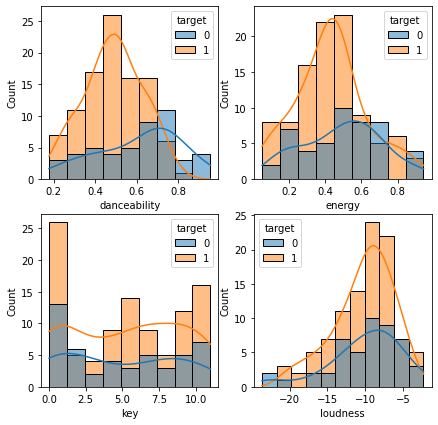

In [33]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))


sns.histplot(data=finalDataset, x=columns[0], kde=True, color="skyblue", hue="target", ax=axs[0,0])
sns.histplot(data=finalDataset, x=columns[1], kde=True, color="skyblue", hue="target", ax=axs[0,1])
sns.histplot(data=finalDataset, x=columns[2], kde=True, color="skyblue", hue="target", ax=axs[1,0])
sns.histplot(data=finalDataset, x=columns[3], kde=True, color="skyblue", hue="target", ax=axs[1,1])

<AxesSubplot:xlabel='instrumentalness', ylabel='Count'>

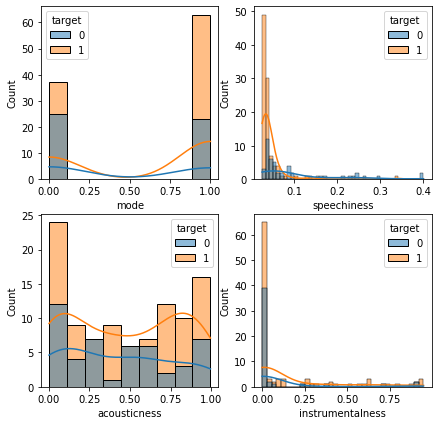

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))


sns.histplot(data=finalDataset, x=columns[4], kde=True, color="skyblue", hue="target", ax=axs[0,0])
sns.histplot(data=finalDataset, x=columns[5], kde=True, color="skyblue", hue="target", ax=axs[0,1])
sns.histplot(data=finalDataset, x=columns[6], kde=True, color="skyblue", hue="target", ax=axs[1,0])
sns.histplot(data=finalDataset, x=columns[7], kde=True, color="skyblue", hue="target", ax=axs[1,1])

<AxesSubplot:xlabel='duration_ms', ylabel='Count'>

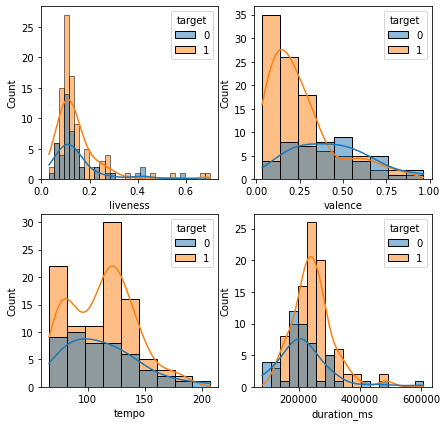

In [36]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))


sns.histplot(data=finalDataset, x=columns[8], kde=True, color="skyblue", hue="target", ax=axs[0,0])
sns.histplot(data=finalDataset, x=columns[9], kde=True, color="skyblue", hue="target", ax=axs[0,1])
sns.histplot(data=finalDataset, x=columns[10], kde=True, color="skyblue", hue="target", ax=axs[1,0])
sns.histplot(data=finalDataset, x=columns[11], kde=True, color="skyblue", hue="target", ax=axs[1,1])

<AxesSubplot:xlabel='time_signature', ylabel='Count'>

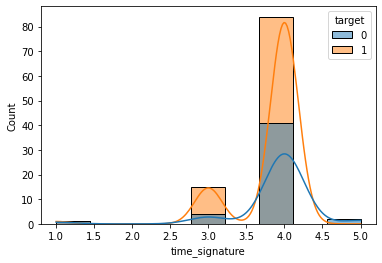

In [50]:
sns.histplot(data=finalDataset, x=columns[12], kde=True, color="skyblue", hue="target")